In [9]:
import os
from pathlib import Path
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
def load_data(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)

In [4]:
data_root = r"C:/Users/hayashi/doutorado/mac6958--dados-redes/webrtc"


In [5]:
file_path = Path(data_root, 'data/processed/facial-1007-sequential.pkl')

In [6]:
data = load_data(file_path)

In [7]:
X,Y = data

In [8]:
X.shape, Y.shape

((34880, 30, 323), (34880, 5))

In [ ]:
train_dataset, test_dataset = dataset['train'], dataset['test']

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [12]:
# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
# Build the model
model = Sequential([
    GRU(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    GRU(50, return_sequences=False),
    Dropout(0.2),
    Dense(5)  # Linear activation for regression
])

C:\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mse'])

In [15]:
# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 30, 50)              │          56,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │             255 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,805 (280.49 KB)

 Trainable params: 71,805 (280.49 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train the model
history = model.fit(X_train, Y_train, epochs=20, batch_size=64, validation_data=(X_val, Y_val))

Epoch 1/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.1164 - mse: 0.1164 - val_loss: 8.7510e-04 - val_mse: 8.7510e-04
Epoch 2/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 4/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 5.9473e-05 - val_mse: 5.9473e-05
Epoch 5/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 5.6643e-05 - val_mse: 5.6643e-05
Epoch 6/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 2.2570e-04 - val_mse: 2.2570e-04
Epoch 7/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 2.9659e-04 - val_mse: 2.9659e-04
Epoch 8/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 1.5814e-05 - val_mse: 1.5814e-05


In [17]:
# Evaluate the model on the validation set
val_loss, val_mse = model.evaluate(X_val, Y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation MSE: {val_mse}")

218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9376e-05 - mse: 1.9376e-05
Validation Loss: 1.9382920072530396e-05
Validation MSE: 1.9382920072530396e-05


In [19]:
import matplotlib.pyplot as plt

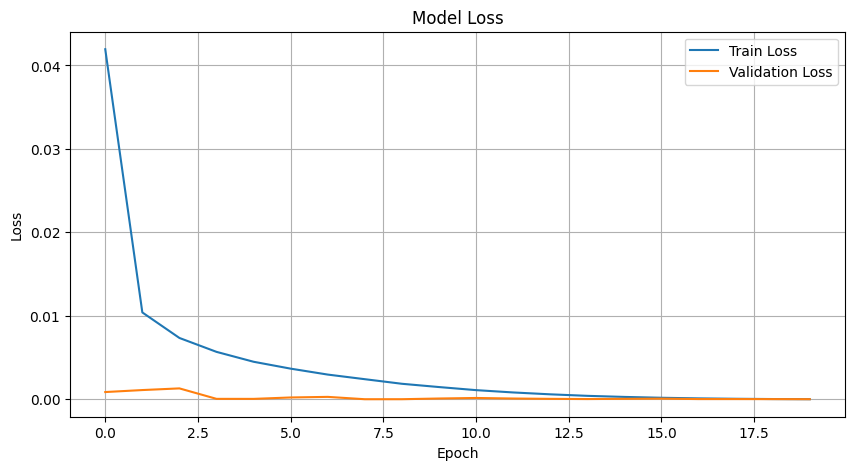

In [20]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()